In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tqdm import tqdm

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Data Analytics/abalone.csv') 
#df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Basic information:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [15]:
# df['Sex']----typecasting and label encoding 
df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes
# df['Rings']-----typecasting and encoding 
df['Rings']=np.where(df['Rings'].values >=10,1,0)
df['Rings']=df['Rings'].astype('category')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   int8    
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   category
dtypes: category(1), float64(7), int8(1)
memory usage: 236.8 KB


In [17]:
x=df.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [18]:
y=df.iloc[:,-1]
y

0       1
1       0
2       0
3       1
4       0
       ..
4172    1
4173    1
4174    0
4175    1
4176    1
Name: Rings, Length: 4177, dtype: category
Categories (2, int64): [0, 1]

### train test data spliting:

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((2923, 8), (1254, 8), (2923,), (1254,))

### Feature Scaling ----> MinMax Scaler

In [20]:
minmax=MinMaxScaler()
xtrain=minmax.fit_transform(xtrain)
xtest=minmax.fit_transform(xtest)

In [21]:
knn=KNeighborsClassifier()
model=knn.fit(xtrain,ytrain)

In [22]:
pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

In [23]:
def metrics(a,b):
    cm=confusion_matrix(a,b)
    print('Confusion Matrix:\n',cm)
    print('-'*100)
    cr=classification_report(a,b)
    print('Class Report:\n',cr)
    print('-'*100)
    acc=accuracy_score(a,b)
    print('Accuracy Score:\n',acc)
    print('-'*100)
    

###  KNN Report:

In [24]:
metrics(ytrain,pred_train)

Confusion Matrix:
 [[1234  233]
 [ 208 1248]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1467
           1       0.84      0.86      0.85      1456

    accuracy                           0.85      2923
   macro avg       0.85      0.85      0.85      2923
weighted avg       0.85      0.85      0.85      2923

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.8491276086212796
----------------------------------------------------------------------------------------------------


In [25]:
metrics(ytest,pred_test)

Confusion Matrix:
 [[268 361]
 [ 39 586]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.87      0.43      0.57       629
           1       0.62      0.94      0.75       625

    accuracy                           0.68      1254
   macro avg       0.75      0.68      0.66      1254
weighted avg       0.75      0.68      0.66      1254

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.6810207336523126
----------------------------------------------------------------------------------------------------


Doing Hyperparameter tuning

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(xtrain,ytrain)

pred_train1=knn.predict(xtrain)
pred_test1=knn.predict(xtest)

In [27]:
metrics(ytrain,pred_train1)

Confusion Matrix:
 [[1265  202]
 [ 180 1276]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1467
           1       0.86      0.88      0.87      1456

    accuracy                           0.87      2923
   macro avg       0.87      0.87      0.87      2923
weighted avg       0.87      0.87      0.87      2923

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.8693123503250085
----------------------------------------------------------------------------------------------------


In [28]:
metrics(ytest,pred_test1)

Confusion Matrix:
 [[295 334]
 [ 50 575]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.86      0.47      0.61       629
           1       0.63      0.92      0.75       625

    accuracy                           0.69      1254
   macro avg       0.74      0.69      0.68      1254
weighted avg       0.74      0.69      0.68      1254

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.69377990430622
----------------------------------------------------------------------------------------------------


In [29]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(xtrain,ytrain)

pred_train2=knn.predict(xtrain)
pred_test2=knn.predict(xtest)

In [30]:
metrics(ytrain,pred_train2)

Confusion Matrix:
 [[1234  233]
 [ 208 1248]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1467
           1       0.84      0.86      0.85      1456

    accuracy                           0.85      2923
   macro avg       0.85      0.85      0.85      2923
weighted avg       0.85      0.85      0.85      2923

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.8491276086212796
----------------------------------------------------------------------------------------------------


In [31]:
metrics(ytest,pred_test2)

Confusion Matrix:
 [[268 361]
 [ 39 586]]
----------------------------------------------------------------------------------------------------
Class Report:
               precision    recall  f1-score   support

           0       0.87      0.43      0.57       629
           1       0.62      0.94      0.75       625

    accuracy                           0.68      1254
   macro avg       0.75      0.68      0.66      1254
weighted avg       0.75      0.68      0.66      1254

----------------------------------------------------------------------------------------------------
Accuracy Score:
 0.6810207336523126
----------------------------------------------------------------------------------------------------


In [32]:
#iteratively doing for k(neighbours)
accuracy=pd.DataFrame(columns=['Train_accuracy','Test_accuracy' ])

for n in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(xtrain,ytrain)
    
    pred_train= model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    train_acc=accuracy_score(ytrain,pred_train)
    test_acc=accuracy_score(ytest,pred_test)
    
    accuracy=accuracy.append({'Train_accuracy':train_acc,'Test_accuracy': test_acc},ignore_index=True)
    
accuracy

,Train_accuracy,Test_accuracy
0,1.000000,0.687400
1,0.865891,0.706539
2,0.869312,0.693780
3,0.843996,0.700159
4,0.849128,0.681021
5,0.838522,0.693780
6,0.841601,0.675439
7,0.827232,0.681818
8,0.828259,0.679426
9,0.824153,0.696172


In [33]:
Result=pd.DataFrame(columns=['K','Training','Testing'])

for k in tqdm(range(1,201)):
              knn=KNeighborsClassifier(n_neighbors=k)
              model=knn.fit(xtrain,ytrain)
    
              pred_train = model.predict(xtrain)
              pred_test = model.predict(xtest)
              
              Result=Result.append({'K':k,'Training':accuracy_score(ytrain,pred_train),'Testing':accuracy_score(ytest,pred_test)},ignore_index=True)
              

100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


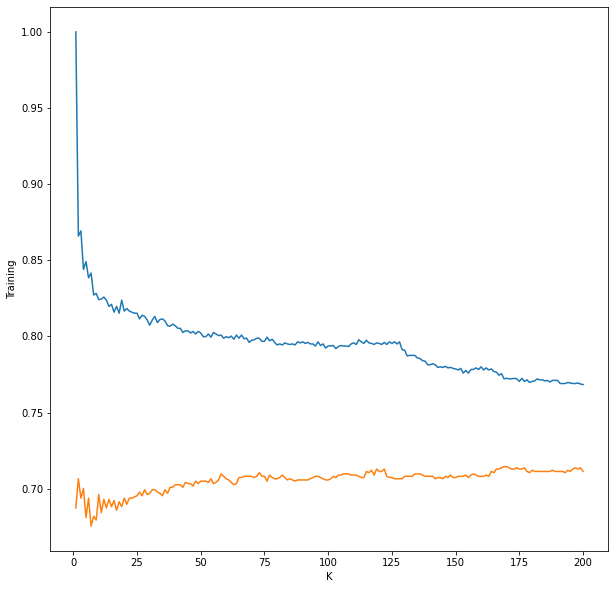

In [34]:
plt.figure(figsize=(10,10))
sns.lineplot(data= Result, x= 'K', y= 'Training')
sns.lineplot(data= Result, x= 'K', y= 'Testing')

In [35]:
Result=pd.DataFrame(columns=['K','Training','Testing'])

for k in tqdm(range(1,26)):
              knn=KNeighborsClassifier(n_neighbors=k)
              model=knn.fit(xtrain,ytrain)
    
              pred_train = model.predict(xtrain)
              pred_test = model.predict(xtest)
              
              Result=Result.append({'K':k,'Training':accuracy_score(ytrain,pred_train),'Testing':accuracy_score(ytest,pred_test)},ignore_index=True)
              

100%|██████████| 25/25 [00:03<00:00,  6.63it/s]


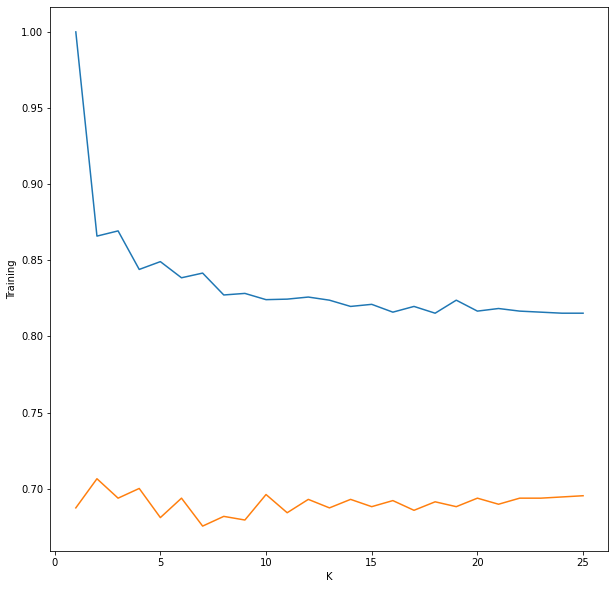

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(data= Result, x= 'K', y= 'Training')
sns.lineplot(data= Result, x= 'K', y= 'Testing')

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.8491276086212796
Accuracy for Test:  0.6810207336523126


In [38]:
knn=KNeighborsClassifier(n_neighbors=4)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.843995894628806
Accuracy for Test:  0.7001594896331739


In [39]:
knn=KNeighborsClassifier(n_neighbors=2)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.8658912076633596
Accuracy for Test:  0.7065390749601276


In [40]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.8693123503250085
Accuracy for Test:  0.69377990430622


In [41]:
knn=KNeighborsClassifier(n_neighbors=16)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.8159425248032843
Accuracy for Test:  0.6921850079744817


In [42]:
knn=KNeighborsClassifier(n_neighbors=17)
model=knn.fit(xtrain,ytrain)

pred_train=knn.predict(xtrain)
pred_test=knn.predict(xtest)

print('Accuracy for Train: ',accuracy_score(ytrain, pred_train))
print('Accuracy for Test: ',accuracy_score(ytest, pred_test))

Accuracy for Train:  0.8197057817310982
Accuracy for Test:  0.6858054226475279


In [43]:
Result=pd.DataFrame(columns=['K','Training','Testing'])

for k in tqdm(range(1,15)):
              knn=KNeighborsClassifier(n_neighbors=k)
              model=knn.fit(xtrain,ytrain)
    
              pred_train = model.predict(xtrain)
              pred_test = model.predict(xtest)
              
              Result=Result.append({'K':k,'Training':accuracy_score(ytrain,pred_train),'Testing':accuracy_score(ytest,pred_test)},ignore_index=True)

100%|██████████| 14/14 [00:02<00:00,  6.16it/s]


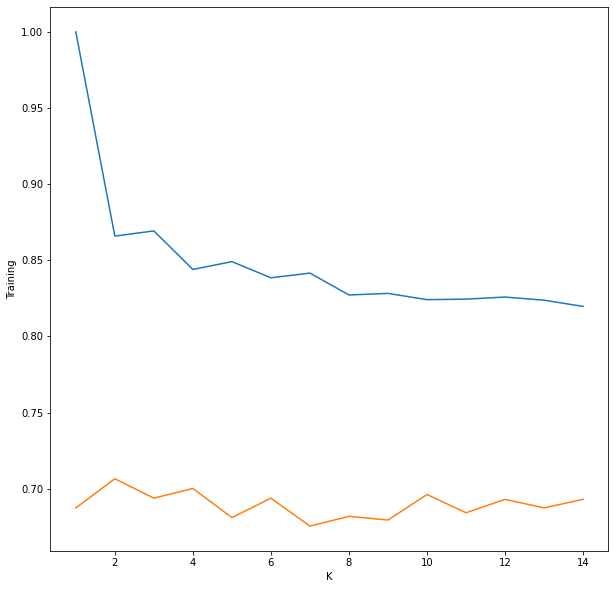

In [44]:
plt.figure(figsize=(10,10))
sns.lineplot(data= Result, x= 'K', y= 'Training')
sns.lineplot(data= Result, x= 'K', y= 'Testing')